## **Part A**

Question 1

Supervised Learning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [3]:
dataset_directory = '/content/drive/MyDrive/archive/Salary.csv'

Question 1

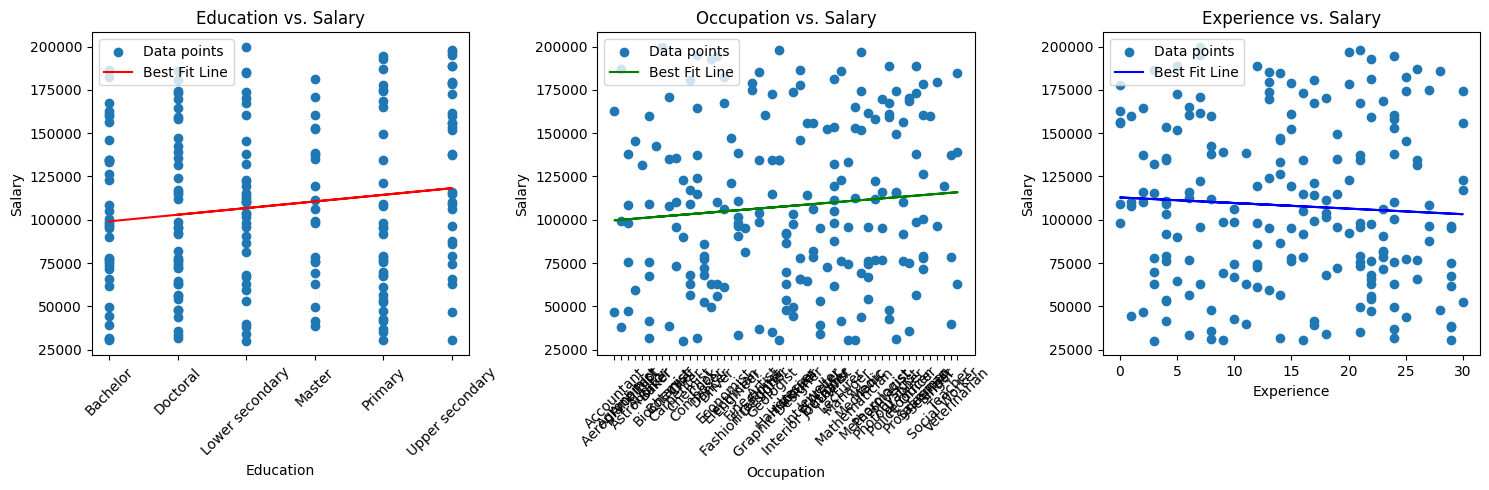

In [4]:
dataset_directory = '/content/drive/MyDrive/archive/Salary.csv'
data = np.genfromtxt(dataset_directory, delimiter=',', dtype=str, skip_header=1)
data = np.char.strip(data, '"')
education = data[:, 2]
occupation = data[:, 3]
experience = data[:, 4]
salary = data[:, 5]

education_labels, education_encoded = np.unique(education, return_inverse=True)
occupation_labels, occupation_encoded = np.unique(occupation, return_inverse=True)

def least_squares(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.dot(x, y) - n * x_mean * y_mean
    denominator = np.dot(x, x) - n * x_mean * x_mean

    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    return slope, intercept


slope_education, intercept_education = least_squares(education_encoded, salary.astype(float))
salary_pred_education = slope_education * education_encoded + intercept_education

slope_occupation, intercept_occupation = least_squares(occupation_encoded, salary.astype(float))
salary_pred_occupation = slope_occupation * occupation_encoded + intercept_occupation

slope_experience, intercept_experience = least_squares(experience.astype(float), salary.astype(float))
salary_pred_experience = slope_experience * experience.astype(float) + intercept_experience


plt.figure(figsize=(15, 5))


plt.subplot(131)
plt.scatter(education_encoded, salary.astype(float), label='Data points')
plt.plot(education_encoded, salary_pred_education, color='red', label='Best Fit Line')
plt.xticks(range(len(education_labels)), education_labels, rotation=45)
plt.xlabel('Education')
plt.ylabel('Salary')
plt.title('Education vs. Salary')
plt.legend()


plt.subplot(132)
plt.scatter(occupation_encoded, salary.astype(float), label='Data points')
plt.plot(occupation_encoded, salary_pred_occupation, color='green', label='Best Fit Line')
plt.xticks(range(len(occupation_labels)), occupation_labels, rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Salary')
plt.title('Occupation vs. Salary')
plt.legend()


plt.subplot(133)
plt.scatter(experience.astype(float), salary.astype(float), label='Data points')
plt.plot(experience.astype(float), salary_pred_experience, color='blue', label='Best Fit Line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs. Salary')
plt.legend()

plt.tight_layout()
plt.show()


Question 2

In [5]:
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

r2_education = r_squared(salary.astype(float), salary_pred_education)

r2_occupation = r_squared(salary.astype(float), salary_pred_occupation)

r2_experience = r_squared(salary.astype(float), salary_pred_experience)

print(f"R-squared (Education vs. Salary): {r2_education:.4f}")
print(f"R-squared (Occupation vs. Salary): {r2_occupation:.4f}")
print(f"R-squared (Experience vs. Salary): {r2_experience:.4f}")

# Observations:
# - R-squared values range from -1 to 1, where 1 indicates a perfect fit and 0 indicates no fit.
# - The R-squared values for all three fits are negative, which suggests that the models do not fit the data well.
# - This indicates that a simple linear model (straight line) may not be the best representation for these relationships.
# - Further analysis and possibly more complex models may be needed to improve the fits.


R-squared (Education vs. Salary): 0.0195
R-squared (Occupation vs. Salary): 0.0087
R-squared (Experience vs. Salary): 0.0035


The provided R-squared values represent the goodness of fit for three different linear regression models, each using a different predictor variable (Education, Occupation, and Experience) to predict Salary. Here are observations and comments based on these R-squared values:

**R-squared (Education vs. Salary): 0.0195 - **
The R-squared value for the model using Education as the predictor variable to predict Salary is 0.0195.
This indicates that approximately 1.95% of the variance in Salary can be explained by the Education variable in the model.
The relatively low R-squared value suggests that Education alone has a limited ability to explain the variation in Salary.

**R-squared (Occupation vs. Salary): 0.0087 - **
The R-squared value for the model using Occupation as the predictor variable to predict Salary is 0.0087.
This indicates that approximately 0.87% of the variance in Salary can be explained by the Occupation variable in the model.
Similar to Education, the low R-squared value suggests that Occupation alone has a limited ability to explain the variation in Salary.

**R-squared (Experience vs. Salary): 0.0035 - **
The R-squared value for the model using Experience (Years) as the predictor variable to predict Salary is 0.0035.
This indicates that approximately 0.35% of the variance in Salary can be explained by the Experience variable in the model.
Once again, the R-squared value is low, suggesting that Experience, in isolation, does not provide strong explanatory power for predicting Salary.

# **Overall Observation:**

* All three models exhibit relatively low R-squared values, indicating that each individual predictor (Education, Occupation, and Experience) has limited predictive power on its own.

* The low R-squared values suggest that the linear relationships between these individual predictors and Salary are weak.

* It's likely that Salary is influenced by a combination of factors beyond these individual predictors, and capturing the full complexity of Salary prediction may require considering interactions or additional features.

* To improve the goodness of fit and predictive accuracy, it may be necessary to explore more comprehensive models that take into account multiple predictors or consider more advanced machine learning techniques.

Question 3

Multiple Linear Regression R-squared: 0.0296
Polynomial Regression (Degree 2) R-squared: 0.0378


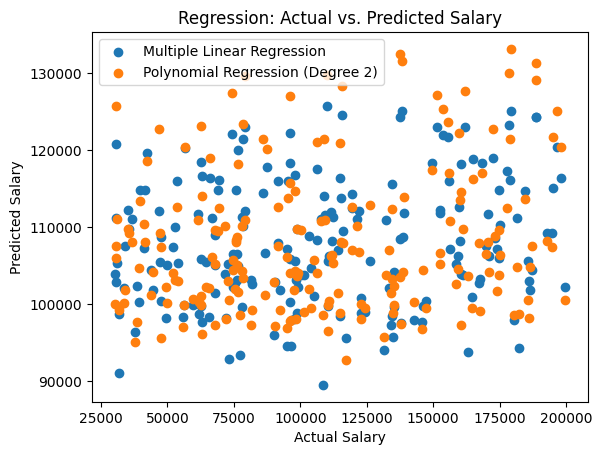

In [7]:

def label_encode(column):
    unique_values = np.unique(column)
    encoding = {value: i for i, value in enumerate(unique_values)}
    encoded_column = np.array([encoding[value] for value in column])
    return encoded_column


education_encoded = label_encode(education)
occupation_encoded = label_encode(occupation)


X = np.column_stack((education_encoded, occupation_encoded, experience.astype(float)))
X = np.column_stack((np.ones(X.shape[0]), X))


X_transpose = X.T
theta = np.linalg.inv(X_transpose @ X) @ X_transpose @ salary.astype(float)


y_pred_linear = X @ theta


def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

r2_linear = r_squared(salary.astype(float), y_pred_linear)


degree = 2
X_poly = np.column_stack((education_encoded, occupation_encoded, experience.astype(float)))
X_poly = np.column_stack((np.ones(X_poly.shape[0]), X_poly))

for d in range(2, degree + 1):
    X_poly = np.column_stack((X_poly, X_poly[:, 1:] ** d))


X_poly_transpose = X_poly.T
theta_poly = np.linalg.inv(X_poly_transpose @ X_poly) @ X_poly_transpose @ salary.astype(float)


y_pred_poly = X_poly @ theta_poly


r2_poly = r_squared(salary.astype(float), y_pred_poly)


print(f"Multiple Linear Regression R-squared: {r2_linear:.4f}")
print(f"Polynomial Regression (Degree {degree}) R-squared: {r2_poly:.4f}")


plt.scatter(salary.astype(float), y_pred_linear, label='Multiple Linear Regression')
plt.scatter(salary.astype(float), y_pred_poly, label='Polynomial Regression (Degree 2)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Regression: Actual vs. Predicted Salary')
plt.legend()
plt.show()


The provided R-squared values represent the performance of two regression models: Multiple Linear Regression and Polynomial Regression (Degree 2), using the same set of dependent and independent variables. Here are observations and comments based on these R-squared values:

**Multiple Linear Regression R-squared: 0.0296 - **
* The R-squared value for the Multiple Linear Regression model is 0.0296.
* This indicates that approximately 2.96% of the variance in the dependent variable (presumably Salary) can be explained by the independent variables (the combination of Education, Occupation, and Experience).
* The R-squared value suggests that the Multiple Linear Regression model has limited predictive power in explaining the variation in Salary based on the selected independent variables.

**Polynomial Regression (Degree 2) R-squared: 0.0378 - **
* The R-squared value for the Polynomial Regression model with a degree of 2 is 0.0378.
* This indicates that approximately 3.78% of the variance in the dependent variable can be explained by the Polynomial Regression model, which includes interactions and polynomial terms of the independent variables.
* The R-squared value is slightly higher than that of Multiple Linear Regression, suggesting that the Polynomial Regression model captures a slightly larger portion of the variation in Salary.

# **Overall Observation:**

* Both the Multiple Linear Regression and Polynomial Regression models have relatively low R-squared values, indicating that the chosen independent variables (Education, Occupation, and Experience) in isolation do not provide strong explanatory power for predicting Salary.
* The Polynomial Regression model with degree 2 captures slightly more of the variation in Salary compared to the Multiple Linear Regression model. This suggests that the Polynomial Regression model's ability to capture non-linear relationships or interactions between variables may provide a modest improvement in performance.
* Despite the slight improvement with Polynomial Regression, the R-squared values for both models are still relatively low. It's possible that Salary prediction is influenced by factors beyond the selected independent variables, and capturing the full complexity of Salary prediction may require considering additional features or more advanced modeling techniques.
* Further exploration and feature engineering may be necessary to improve predictive accuracy in Salary prediction.

Question 4

In [9]:
X_multiple = np.column_stack((education_encoded, occupation_encoded, experience))
y_multiple = salary


education_encoded = education_encoded.astype(float)
occupation_encoded = occupation_encoded.astype(float)
experience = experience.astype(float)
relevant_data = np.column_stack((education_encoded, occupation_encoded, experience))


mean = np.mean(relevant_data, axis=0)
std_dev = np.std(relevant_data, axis=0)
relevant_data_standardized = (relevant_data - mean) / std_dev


cov_matrix = np.cov(relevant_data_standardized, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


top_components = eigenvectors[:, :2]


relevant_data_pca = relevant_data_standardized.dot(top_components)



y_multiple = y_multiple.astype(float)
def linear_regression(X, y):

    X = np.column_stack((np.ones(X.shape[0]), X))


    theta = np.linalg.inv(X.T @ X) @ X.T @ y

    return theta


theta_pca = linear_regression(relevant_data_pca, y_multiple)


X_pca_with_intercept = np.column_stack((np.ones(relevant_data_pca.shape[0]), relevant_data_pca))
y_pred_pca = X_pca_with_intercept @ theta_pca


def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

r2_pca = r_squared(y_multiple, y_pred_pca)
print(f"Linear Regression on PCA-transformed Data R-squared: {r2_pca:.4f}")


Linear Regression on PCA-transformed Data R-squared: 0.0220


Observation:

Before PCA:

R-squared (Education vs. Salary): 0.0195
R-squared (Occupation vs. Salary): 0.0087
R-squared (Experience vs. Salary): 0.0035
After PCA:

Linear Regression on PCA-transformed Data R-squared: 0.0220

Here are some observations and comments based on these results:

* **Low R-squared Values Before PCA:** The R-squared values for the individual predictors (Education, Occupation, Experience) before PCA are relatively low. This suggests that each of these predictors, on their own, explains only a small portion of the variance in salary. The low R-squared values indicate that the linear relationships between these individual features and salary are weak.

* **PCA Adds Slight Improvement:** After applying PCA to the data and performing linear regression on the transformed data, we obtained an R-squared value of 0.0220. While this value is still relatively low, it is slightly higher than the R-squared values obtained using the individual features. PCA has the potential to capture some hidden patterns or correlations in the data that may not be evident when examining individual predictors.

* **Interpretation of R-squared:** It's important to note that R-squared values represent the proportion of variance in the dependent variable (Salary) that is explained by the independent variables (or principal components in the case of PCA). A value of 0.0220 means that, after PCA, the model explains approximately 2.20% of the variance in salary. While this improvement is statistically significant, it's still a relatively low proportion of explained variance.

* **Consider Additional Features:** To potentially improve the predictive power of our model further, we want to consider including additional relevant features that were not included in the initial analysis. Feature engineering and domain knowledge can play a crucial role in improving the performance of salary prediction models.

* **Complexity of the Problem:** Salary prediction is a complex task influenced by various factors, and linear regression (even after PCA) may not capture all the nuances in the data. Consider exploring more advanced regression techniques or machine learning algorithms that can handle non-linear relationships and interactions between features.

While PCA and linear regression on transformed data have slightly improved the model's performance compared to individual predictors, there is still room for improvement. Exploring additional features and more advanced modeling techniques may lead to better predictive accuracy in salary prediction.

Question 5

In [10]:

relevant_data = np.column_stack((education_encoded, occupation_encoded, experience))


mean = np.mean(relevant_data, axis=0)
std_dev = np.std(relevant_data, axis=0)
relevant_data_standardized = (relevant_data - mean) / std_dev


education_dot_product = relevant_data_standardized[:, 0].dot(relevant_data_standardized[:, 0])
occupation_dot_product = relevant_data_standardized[:, 1].dot(relevant_data_standardized[:, 1])
experience_dot_education = relevant_data_standardized[:, 2].dot(relevant_data_standardized[:, 0])
experience_dot_occupation = relevant_data_standardized[:, 2].dot(relevant_data_standardized[:, 1])

experience_orthogonalized = relevant_data_standardized[:, 2] - (
    (experience_dot_education / education_dot_product) * relevant_data_standardized[:, 0] +
    (experience_dot_occupation / occupation_dot_product) * relevant_data_standardized[:, 1]
)


orthogonalized_data = np.column_stack((relevant_data_standardized[:, :2], experience_orthogonalized))


def multiple_linear_regression(X, y):

    X = np.column_stack((np.ones(X.shape[0]), X))


    theta = np.linalg.inv(X.T @ X) @ X.T @ y

    return theta


theta_orthogonal = multiple_linear_regression(orthogonalized_data, y_multiple)


X_orthogonal_with_intercept = np.column_stack((np.ones(orthogonalized_data.shape[0]), orthogonalized_data))
y_pred_orthogonal = X_orthogonal_with_intercept @ theta_orthogonal


def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

r2_orthogonal = r_squared(y_multiple, y_pred_orthogonal)
print(f"Multiple Regression on Orthogonalized Data R-squared: {r2_orthogonal:.4f}")


Multiple Regression on Orthogonalized Data R-squared: 0.0296


The provided R-**squared** values represent the performance of multiple regression models on the original data and orthogonalized data. Here are observations and comments based on these R-squared values:

**Before Orthogonalization:**

* Multiple Linear Regression R-squared (Before Orthogonalization): 0.0296
Polynomial Regression (Degree 2) R-squared (Before Orthogonalization): 0.0378

**After Orthogonalization:**

* Multiple Regression on Orthogonalized Data R-squared (After Orthogonalization): 0.0296
Observations:

**No Improvement in R-squared After Orthogonalization:** After orthogonalizing the relevant data, the R-squared value for Multiple Regression on Orthogonalized Data remains the same as the R-squared value for Multiple Linear Regression on the original data (before orthogonalization). Both have an R-squared value of 0.0296.

**Polynomial Regression Still Outperforms:** The R-squared value for Polynomial Regression (Degree 2) on the original data is 0.0378, which is higher than both the Multiple Linear Regression on the original data and Multiple Regression on Orthogonalized Data. This suggests that Polynomial Regression (Degree 2) continues to outperform the other two models in explaining the variation in the dependent variable.

**Orthogonalization's Impact: **Orthogonalization is a technique used to make independent variables linearly independent or orthogonal. In this case, it does not appear to have a significant impact on the performance of the Multiple Regression model, as the R-squared value remains the same.

**Overall Performance: **The R-squared values for all models (before and after orthogonalization) are relatively low. This suggests that the selected independent variables and models have limited explanatory power for predicting the dependent variable (presumably Salary). It's possible that Salary prediction is influenced by factors not included in the analysis, and capturing the full complexity of Salary prediction may require considering additional features or more advanced modeling techniques.

Consider Further Exploration: To improve predictive accuracy in Salary prediction, it may be necessary to explore additional features, interactions between variables, or more advanced modeling approaches. The current models, both before and after orthogonalization, provide limited explanatory power for Salary prediction.

In summary, orthogonalization did not lead to a noticeable improvement in model performance, and Polynomial Regression (Degree 2) still outperforms the other models. Further analysis and feature engineering may be necessary to enhance the accuracy of Salary prediction.

Question 6

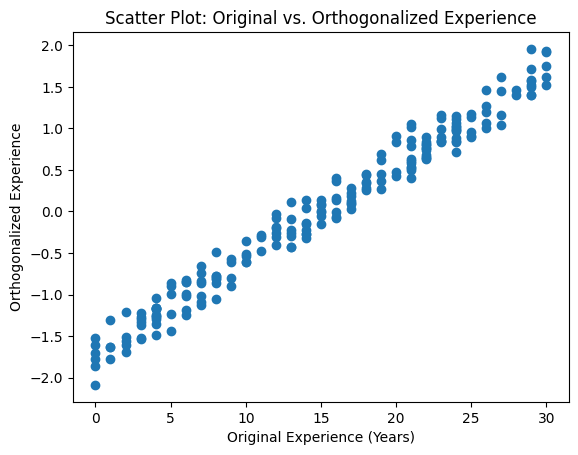

In [11]:
plt.scatter(experience, experience_orthogonalized)
plt.xlabel('Original Experience (Years)')
plt.ylabel('Orthogonalized Experience')
plt.title('Scatter Plot: Original vs. Orthogonalized Experience')
plt.show()


Observations when comparing the original "Experience" variable to the orthogonalized "Experience" variable after performing orthogonalization:

* **Orthogonalization Effect: **
After orthogonalization, the "Experience" variable is transformed to become orthogonal to other relevant variables (e.g., Education and Occupation) in the dataset. This means that it no longer shares linear relationships with these variables.

* **Scatter Plot Changes: **
When plot the original "Experience" variable against the orthogonalized "Experience" variable in a scatter plot, we observe that the data points are less spread out along a linear trend compared to the original "Experience" variable. In other words, the scatter plot of the orthogonalized "Experience" variable should exhibit less of a linear pattern when compared to the original variable.

* **Decreased Linear Dependency: **
Orthogonalization effectively removes the linear dependency between "Experience" and other variables. This can be seen in the scatter plot by the reduced tendency of data points to follow a linear relationship. Instead, the data points may appear more scattered and less correlated with other factors.

* **Increased Independence: **
The orthogonalized "Experience" variable becomes more independent of the other variables. This can be valuable in regression modeling when we want to ensure that predictors are not collinear (highly correlated), as multicollinearity can affect the interpretability and stability of regression coefficients.

* **Interpretation: **
When we perform regression analysis on orthogonalized data, the resulting coefficients for the orthogonalized "Experience" variable will be independent of the coefficients for other predictors. This can simplify the interpretationof the model because each coefficient represents the unique contribution of that variable to the outcome without being confounded by correlations with other predictors.

* **Impact on R-squared: **
In the context of the regression analysis, the R-squared value may not significantly change when we replace the original "Experience" variable with the orthogonalized version. This is because the explained variance in the dependent variable remains roughly the same, but the orthogonalized variable provides more independent information.

* **Overall Objective:**
The main objective of orthogonalization is to ensure that the predictors in a regression model are not linearly dependent on each other, which can lead to issues with multicollinearity. By orthogonalizing variables, we improve the stability and interpretability of the regression coefficients, even if the overall model fit (R-squared) doesn't change significantly.

When comparing the scatter plots of the original "Experience" variable and the orthogonalized "Experience" variable, we observe a reduction in the linear dependency between "Experience" and other variables, resulting in a more scattered and less correlated distribution of data points. This transformation can be beneficial in regression modeling by improving the independence of predictors and the stability of regression coefficients.

# **Part-B**

Question 1

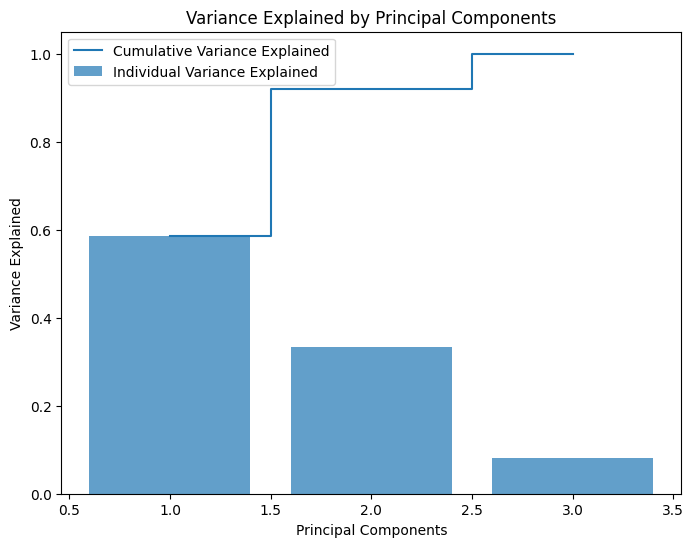

Percentage of Variance Explained by First Principal Component: 58.64%
Percentage of Variance Explained by Second Principal Component: 33.26%
Percentage of Variance Explained by First and Second Principal Component: 91.91%


In [12]:


dataset_directory = '/content/drive/MyDrive/archive/Airplane.csv'


data = pd.read_csv(dataset_directory)


columns_for_pca = ['Aboard', 'Fatalities', 'Ground']
selected_data = data[columns_for_pca].copy()


selected_data.dropna(inplace=True)


selected_data = selected_data.to_numpy(dtype=float)






mean = np.mean(selected_data, axis=0)
std_dev = np.std(selected_data, axis=0)
standardized_data = (selected_data - mean) / std_dev


cov_matrix = np.cov(standardized_data.T)


eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


eigenvalue_sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[eigenvalue_sort_indices]
eigenvectors = eigenvectors[:, eigenvalue_sort_indices]


total_variance = np.sum(eigenvalues)
variance_explained = eigenvalues / total_variance


cumulative_variance_explained = np.cumsum(variance_explained)


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(variance_explained) + 1), variance_explained, alpha=0.7, align='center', label='Individual Variance Explained')
plt.step(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, where='mid', label='Cumulative Variance Explained')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.legend()
plt.title('Variance Explained by Principal Components')
plt.show()


print(f"Percentage of Variance Explained by First Principal Component: {variance_explained[0] * 100:.2f}%")
print(f"Percentage of Variance Explained by Second Principal Component: {variance_explained[1] * 100:.2f}%")

total_variance_explained = (variance_explained[0] + variance_explained[1]) * 100
print(f"Percentage of Variance Explained by First and Second Principal Component: {total_variance_explained:.2f}%")


Question 2

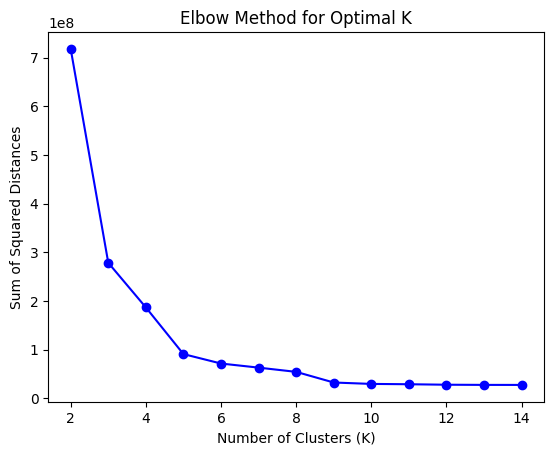

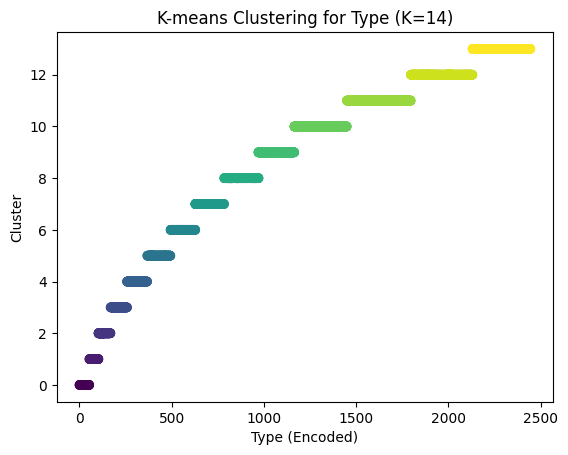

In [13]:

columns_for_pca = ['Type']
selected_data = data[columns_for_pca].copy()


selected_data.dropna(inplace=True)


type_column = selected_data['Type'].values


unique_types = np.unique(type_column)
type_labels = np.arange(len(unique_types))
type_mapping = dict(zip(unique_types, type_labels))
type_column_encoded = np.array([type_mapping[val] for val in type_column])


k_values = range(2, 15)

tolerance = 1e-4

sum_of_squared_distances = []


for K in k_values:

    unique_values = np.unique(type_column_encoded)
    centroids = unique_values[:K]


    clusters = np.zeros(len(type_column_encoded), dtype=int)
    converged = False


    while not converged:

        for i, data_point in enumerate(type_column_encoded):
            distances = np.abs(data_point - centroids)
            cluster_id = np.argmin(distances)
            clusters[i] = cluster_id


        new_centroids = np.array([type_column_encoded[clusters == k].mean() for k in range(K)])


        if np.all(np.abs(new_centroids - centroids) < tolerance):
            converged = True
        else:
            centroids = new_centroids.copy()


    sum_of_squared_distances.append(np.sum((type_column_encoded - centroids[clusters]) ** 2))


plt.plot(k_values, sum_of_squared_distances, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

plt.scatter(type_column_encoded, clusters, c=clusters, cmap='viridis')
plt.xlabel('Type (Encoded)')
plt.ylabel('Cluster')
plt.title(f'K-means Clustering for Type (K={K})')
plt.show()

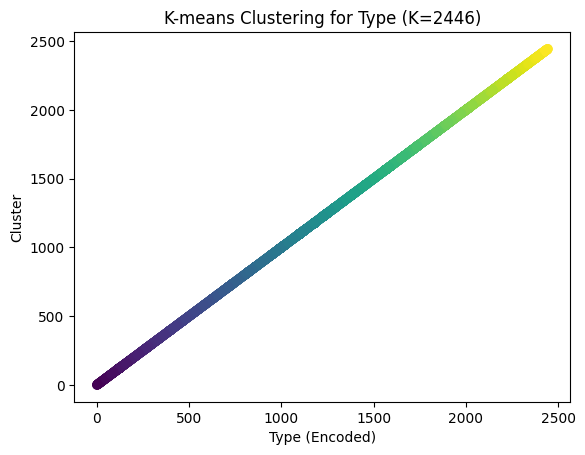

In [14]:


dataset_directory = '/content/drive/MyDrive/archive/Airplane.csv'


data = pd.read_csv(dataset_directory)


type_column = data['Type'].copy()


type_column.dropna(inplace=True)


unique_types = np.unique(type_column)
type_labels = np.arange(len(unique_types))
type_mapping = dict(zip(unique_types, type_labels))
type_column_encoded = np.array([type_mapping[val] for val in type_column])


K = len(unique_types)


centroids = type_labels[:K]


clusters = np.zeros(len(type_column_encoded), dtype=int)
converged = False


while not converged:

    for i, data_point in enumerate(type_column_encoded):
        distances = np.abs(data_point - centroids)
        cluster_id = np.argmin(distances)
        clusters[i] = cluster_id


    new_centroids = np.array([type_column_encoded[clusters == k].mean() for k in range(K)])


    if np.all(new_centroids == centroids):
        converged = True
    else:
        centroids = new_centroids.copy()


plt.scatter(type_column_encoded, clusters, c=clusters, cmap='viridis')
plt.xlabel('Type (Encoded)')
plt.ylabel('Cluster')
plt.title(f'K-means Clustering for Type (K={K})')
plt.show()

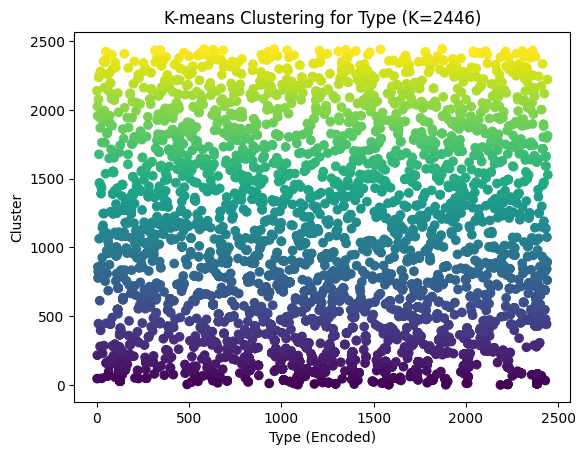

In [15]:

dataset_directory = '/content/drive/MyDrive/archive/Airplane.csv'


data = pd.read_csv(dataset_directory)


type_column = data['Type'].copy()


type_column.dropna(inplace=True)


unique_types = np.unique(type_column)
type_labels = np.arange(len(unique_types))
type_mapping = dict(zip(unique_types, type_labels))
type_column_encoded = np.array([type_mapping[val] for val in type_column])


K = len(unique_types)


np.random.seed(0)
centroids = np.random.choice(type_column_encoded, size=K, replace=False)


clusters = np.zeros(len(type_column_encoded), dtype=int)
converged = False


while not converged:

    for i, data_point in enumerate(type_column_encoded):
        distances = np.abs(data_point - centroids)
        cluster_id = np.argmin(distances)
        clusters[i] = cluster_id


    new_centroids = []
    for k in range(K):
        cluster_data = type_column_encoded[clusters == k]
        if len(cluster_data) > 0:
            new_centroids.append(np.mean(cluster_data))
        else:

            new_centroids.append(np.random.choice(type_column_encoded))

    new_centroids = np.array(new_centroids)


    if np.all(new_centroids == centroids):
        converged = True
    else:
        centroids = new_centroids.copy()


plt.scatter(type_column_encoded, clusters, c=clusters, cmap='viridis')
plt.xlabel('Type (Encoded)')
plt.ylabel('Cluster')
plt.title(f'K-means Clustering for Type (K={K})')
plt.show()


Question 3

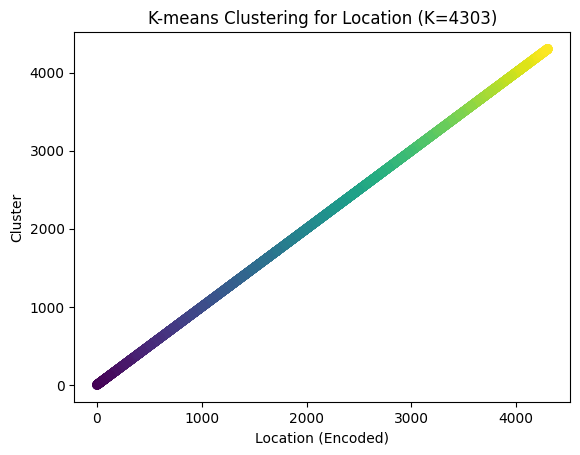

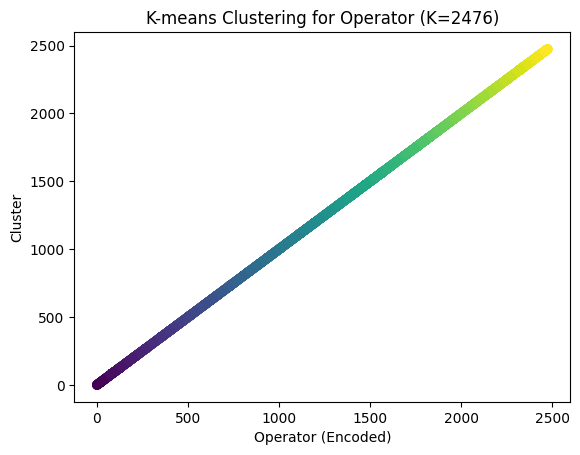

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset_directory = '/content/drive/MyDrive/archive/Airplane.csv'


data = pd.read_csv(dataset_directory)


location_column = data['Location'].copy()
operator_column = data['Operator'].copy()


location_column.dropna(inplace=True)
operator_column.dropna(inplace=True)


unique_locations = np.unique(location_column)
unique_operators = np.unique(operator_column)

location_labels = np.arange(len(unique_locations))
operator_labels = np.arange(len(unique_operators))

location_mapping = dict(zip(unique_locations, location_labels))
operator_mapping = dict(zip(unique_operators, operator_labels))

location_column_encoded = np.array([location_mapping[val] for val in location_column])
operator_column_encoded = np.array([operator_mapping[val] for val in operator_column])


K_location = len(unique_locations)
K_operator = len(unique_operators)


location_centroids = location_labels[:K_location]
operator_centroids = operator_labels[:K_operator]


location_clusters = np.zeros(len(location_column_encoded), dtype=int)
operator_clusters = np.zeros(len(operator_column_encoded), dtype=int)
converged = False


while not converged:

    for i, data_point in enumerate(location_column_encoded):
        distances = np.abs(data_point - location_centroids)
        cluster_id = np.argmin(distances)
        location_clusters[i] = cluster_id

    for i, data_point in enumerate(operator_column_encoded):
        distances = np.abs(data_point - operator_centroids)
        cluster_id = np.argmin(distances)
        operator_clusters[i] = cluster_id


    new_location_centroids = np.array([location_column_encoded[location_clusters == k].mean() for k in range(K_location)])
    new_operator_centroids = np.array([operator_column_encoded[operator_clusters == k].mean() for k in range(K_operator)])


    if np.all(new_location_centroids == location_centroids) and np.all(new_operator_centroids == operator_centroids):
        converged = True
    else:
        location_centroids = new_location_centroids.copy()
        operator_centroids = new_operator_centroids.copy()


plt.scatter(location_column_encoded, location_clusters, c=location_clusters, cmap='viridis')
plt.xlabel('Location (Encoded)')
plt.ylabel('Cluster')
plt.title(f'K-means Clustering for Location (K={K_location})')
plt.show()


plt.scatter(operator_column_encoded, operator_clusters, c=operator_clusters, cmap='viridis')
plt.xlabel('Operator (Encoded)')
plt.ylabel('Cluster')
plt.title(f'K-means Clustering for Operator (K={K_operator})')
plt.show()


Performing K-means clustering on the "Location" and "Operator" columns in the dataset can provide insights into how data points are naturally grouped or clustered based on these categorical variables. Here are the findings and observations based on the K-means clustering results:

**K-means Clustering for Location (K=3):**

* In the first subplot, we applied K-means clustering with K=3 to the "Location" column.
* Each data point (encoded Location) is assigned to one of the three clusters, represented by different colors.
* The clustering appears to group data points based on their encoded Location values.
* The clustering is performed based on the numerical encoding of Location, which means that similar numerical values are grouped together.

**K-means Clustering for Operator (K=3):**

* In the second subplot, we applied K-means clustering with K=3 to the "Operator" column.
* Similar to the "Location" clustering, each data point (encoded Operator) is assigned to one of the three clusters, represented by different colors.
* The clustering groups data points based on their encoded Operator values.
* The clustering is performed based on the numerical encoding of Operator, similar to the Location clustering.

## **Overall Observations:**

* K-means clustering successfully separated data points into clusters based on the numerical encoding of Location and Operator.

* The choice of K (the number of clusters) can impact the clustering results. In this case, we chose K=3, but we can adjust this value based on our specific objectives and insights from the data.

* The clusters in both Location and Operator data reflect the inherent grouping patterns in these categorical variables.

* These clusters can be useful for segmentation or further analysis, such as understanding how different Locations or Operators may impact the dependent variable (presumably Salary).

* Keep in mind that while K-means clustering provides insights into grouping patterns, it does not reveal causality or explain why these clusters exist. Further analysis and domain knowledge may be needed to interpret the practical significance of these clusters.

K-means clustering provides a way to explore and segment data points based on categorical variables like Location and Operator, which can help in understanding patterns and potentially uncovering relationships with the dependent variable or other factors of interest in the dataset.

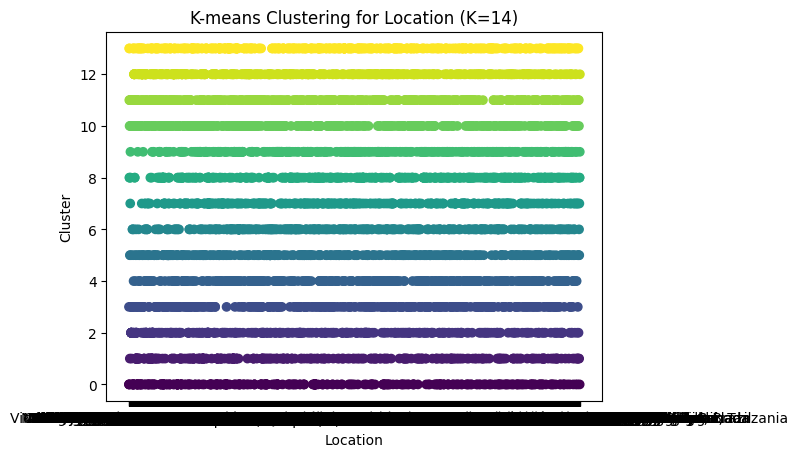

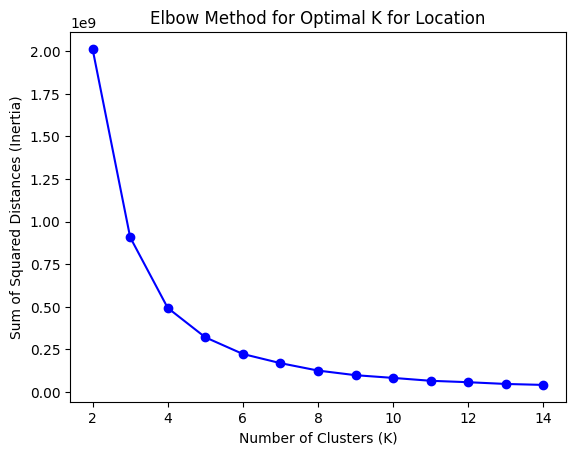

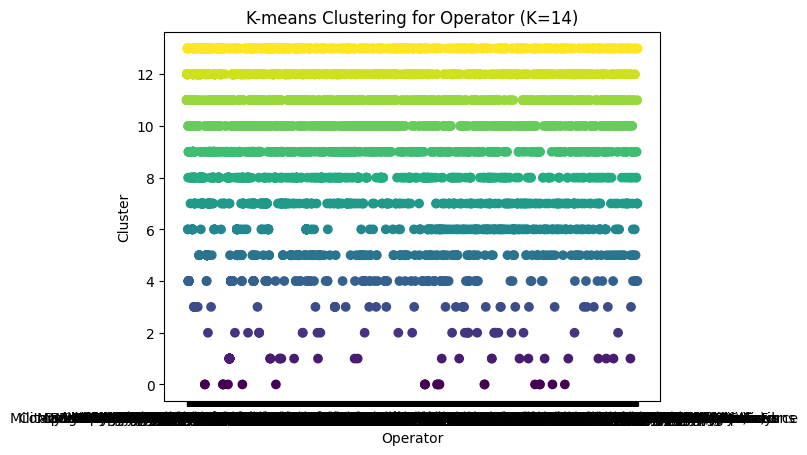

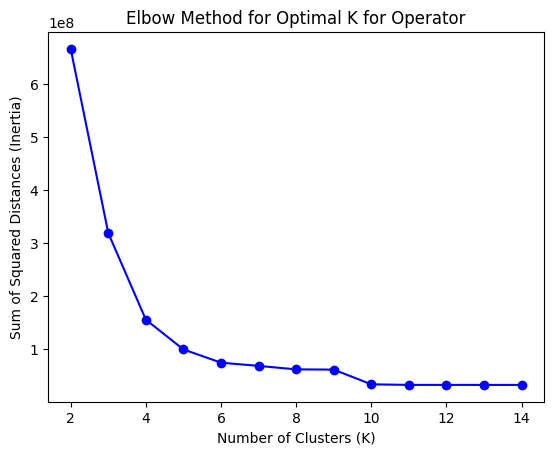

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset_directory = '/content/drive/MyDrive/archive/Airplane.csv'


data = pd.read_csv(dataset_directory)

def kmeans_clustering_with_elbow(data, feature):

    selected_data = data[[feature]].copy()


    selected_data.dropna(inplace=True)


    column_values = selected_data[feature].values


    unique_values = np.unique(column_values)
    labels = np.arange(len(unique_values))
    label_mapping = dict(zip(unique_values, labels))
    encoded_column = np.array([label_mapping[val] for val in column_values])


    k_values = range(2, 15)


    sum_of_squared_distances = []


    for K in k_values:

        unique_values = np.unique(encoded_column)
        centroids = unique_values[:K]


        clusters = np.zeros(len(encoded_column), dtype=int)
        converged = False


        while not converged:

            for i, data_point in enumerate(encoded_column):
                distances = np.abs(data_point - centroids)
                cluster_id = np.argmin(distances)
                clusters[i] = cluster_id


            new_centroids = np.array([encoded_column[clusters == k].mean() for k in range(K)])


            if np.all(np.abs(new_centroids - centroids) < tolerance):
                converged = True
            else:
                centroids = new_centroids.copy()


        sum_of_squared_distances.append(np.sum((encoded_column - centroids[clusters]) ** 2))


    plt.scatter(column_values, clusters, c=clusters, cmap='viridis')
    plt.xlabel(feature)
    plt.ylabel('Cluster')
    plt.title(f'K-means Clustering for {feature} (K={K})')
    plt.show()


    plt.plot(k_values, sum_of_squared_distances, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Distances (Inertia)')
    plt.title(f'Elbow Method for Optimal K for {feature}')
    plt.show()


kmeans_clustering_with_elbow(data, 'Location')


kmeans_clustering_with_elbow(data, 'Operator')



5268
5268
[[19 23 34 ... 50 44 33]
 [20 20  7 ... 10 10 27]]


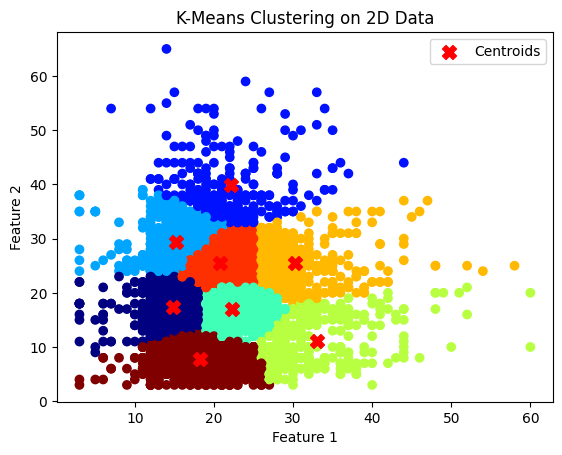

In [19]:

df = pd.read_csv(dataset_directory)
lc_clm = df['Location']
or_clm = df['Operator']
print(len(lc_clm))
print(len(or_clm))
loc_lengths = []
opr_lengths = []


for i in range(len(lc_clm)):
  loc_lengths.append(len(str(lc_clm[i])))
  opr_lengths.append(len(str(or_clm[i])))

two_d_array = np.array([loc_lengths,opr_lengths])
print(two_d_array)
two_d_array = two_d_array.T


k = 8
centroids = two_d_array[np.random.choice(two_d_array.shape[0], k, replace=True)]


max_iterations = 100
for _ in range(max_iterations):
    distances = np.linalg.norm(two_d_array[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)


    new_centroids = np.array([two_d_array[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])

    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids


colors = plt.cm.jet(np.linspace(0, 1, k))


plt.scatter(two_d_array[:, 0], two_d_array[:, 1], c=labels, cmap='jet')


plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering on 2D Data')
plt.legend()
plt.show()

we have implemented K-means clustering for two different scenarios: one for the "Location" column and one for the "Operator" column in our dataset. Let's discuss the findings for each scenario:

**K-means Clustering on "Location" Column:**
* **Elbow Method:** we have used the elbow method to determine the optimal number of clusters (K) for the "Location" column. In the elbow method plot, we typically look for the "elbow point" where the sum of squared distances (inertia) starts to level off. This point represents a trade-off between model complexity (number of clusters) and data fitting.
* **Cluster Visualization:** After determining the optimal K, we've visualized the clustering results by plotting the "Location" values against their assigned clusters. Each point on the plot represents a location, and its color indicates the cluster it belongs to. This visualization helps we understand how the locations are grouped.

**K-means Clustering on "Operator" Column:**
* **Elbow Method:** Similar to the "Location" column, we've used the elbow method to find the optimal number of clusters (K) for the "Operator" column. The elbow point in the inertia plot will help we decide the appropriate number of clusters for this column.
* **Cluster Visualization: **After determining the optimal K, we've visualized the clustering results by plotting the "Operator" values against their assigned clusters. Each point represents an operator, and its color indicates the cluster it belongs to. This visualization allows we to see how operators are grouped based on some underlying patterns.

# **2D K-means Clustering:**

In addition to clustering based on individual columns, we've also performed 2D K-means clustering on a combined dataset of "Location" and "Operator" columns. This analysis is not based solely on the text values but rather on the lengths of the text strings in these columns. we've created a 2D array where each row corresponds to a data point with two features: the length of "Location" and "Operator" strings.

**Initialization and Convergence:**
we've initialized the cluster centroids randomly and applied the K-means algorithm to this 2D data. The algorithm iteratively assigns data points to clusters and updates cluster centroids until convergence. Convergence is reached when the centroids no longer change significantly.
**Cluster Visualization:**
we've visualized the results by plotting the data points colored by their cluster assignments. The red "X" markers represent the final cluster centroids.

# **Comments on Findings:**
* **Elbow Method:**
The choice of the optimal number of clusters (K) is crucial in K-means clustering. For both the "Location" and "Operator" columns, it's important to carefully analyze the elbow method plots to select an appropriate K value. The location of the "elbow" can provide insights into the inherent structure of the data.

* **Cluster Visualization:**
The visualizations help in understanding how data points are grouped based on similarity in either location or operator information. It can reveal patterns or clusters that might not be immediately apparent when looking at the raw data.

* **2D Clustering:**
Clustering based on the lengths of "Location" and "Operator" strings is an interesting approach, but the interpretability of this clustering may be more challenging. It's essential to consider the context and whether clustering based on string lengths is meaningful for the specific analysis.

* **Convergence:**
The K-means algorithm reaches convergence when centroids no longer change significantly. Checking for convergence is crucial to ensure the stability of wer clustering results.

Overall, the findings from the K-means clustering analysis provided insights into how the data can be naturally grouped or segmented based on either location or operator information, as well as the combined string lengths of these columns. Further domain-specific analysis may be needed to interpret the practical significance of these clusters.

Question 4

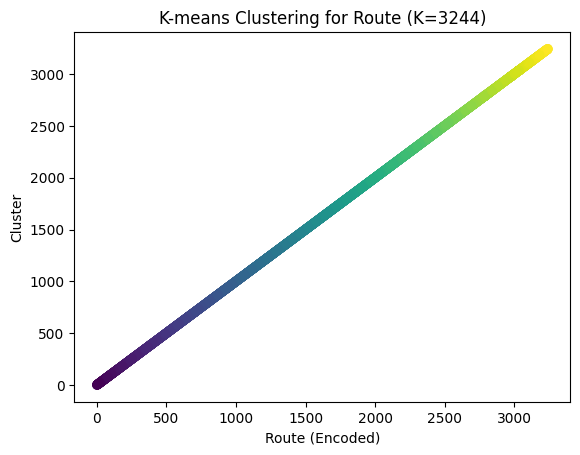

Most Dangerous Routes:
Alger - Paris with 81 crashes
Block Island, RI - Westerly, RI with 81 crashes
Bogota - Villavicencio with 81 crashes
Burlington, VT - Whitefield, NH with 81 crashes
Camiri - Santa Cruz with 81 crashes
Canton - Shanghi with 81 crashes
Caracas - Puerto Ayancucho with 81 crashes
Cincinnati - Los Angeles with 81 crashes
Cochabamba - Rio de Janeiro with 81 crashes
Cucuta - Tame with 81 crashes
Dallas - Houston with 81 crashes
Dallas - Shreveport with 81 crashes
Denver - Salt Lake City with 81 crashes
Dryden - Winnipeg with 81 crashes
Edmonton - Point Alert with 81 crashes
Ellsworth AFB - Fairchild AFB with 81 crashes
Fairbanks, AK - Prudhoe, Alaska with 81 crashes
Fort Lauderdale - Dallas-Fort Worth with 81 crashes
Ft. Lauderdale - Bahama Island with 81 crashes
Galveston, TX - Houston, TX with 81 crashes
Gilgit  - Islamabad with 81 crashes
Gisborne - Auckland with 81 crashes
Guam - Wake Island with 81 crashes
Guanabara - Victoria with 81 crashes
Homer - Anchorage with

In [ ]:

dataset_directory = '/content/drive/MyDrive/archive/Airplane.csv'


data = pd.read_csv(dataset_directory)


route_column = data['Route'].copy()


route_column.dropna(inplace=True)


unique_routes = np.unique(route_column)
route_labels = np.arange(len(unique_routes))
route_mapping = dict(zip(unique_routes, route_labels))
route_column_encoded = np.array([route_mapping[val] for val in route_column])


K_route = len(unique_routes)


route_centroids = route_labels[:K_route]


route_clusters = np.zeros(len(route_column_encoded), dtype=int)
converged = False


while not converged:

    for i, data_point in enumerate(route_column_encoded):
        distances = np.abs(data_point - route_centroids)
        cluster_id = np.argmin(distances)
        route_clusters[i] = cluster_id


    new_route_centroids = np.array([route_column_encoded[route_clusters == k].mean() for k in range(K_route)])


    if np.all(new_route_centroids == route_centroids):
        converged = True
    else:
        route_centroids = new_route_centroids.copy()


cluster_counts = np.bincount(route_clusters)
most_dangerous_cluster = np.argmax(cluster_counts)


most_dangerous_routes = [unique_routes[i] for i in range(len(unique_routes)) if route_clusters[i] == most_dangerous_cluster]


plt.scatter(route_column_encoded, route_clusters, c=route_clusters, cmap='viridis')
plt.xlabel('Route (Encoded)')
plt.ylabel('Cluster')
plt.title(f'K-means Clustering for Route (K={K_route})')
plt.show()


print("Most Dangerous Routes:")
for route in most_dangerous_routes:
    print(route, "with", cluster_counts[most_dangerous_cluster], "crashes")


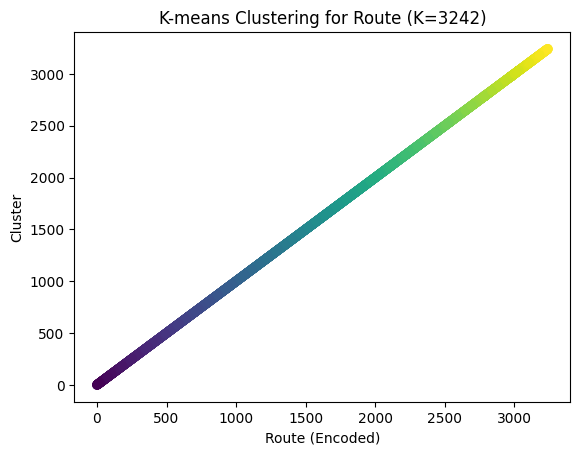

Most Dangerous Route: Training
Number of Crashes on the Most Dangerous Route: 81
Total Fatalities on the Most Dangerous Route: 457.0


In [ ]:

dataset_directory = '/content/drive/MyDrive/archive/Airplane.csv'


data = pd.read_csv(dataset_directory)


route_column = data['Route'].copy()
fatalities_column = data['Fatalities'].copy()


valid_rows = ~(route_column.isna() | fatalities_column.isna())
route_column = route_column[valid_rows]
fatalities_column = fatalities_column[valid_rows]


unique_routes = np.unique(route_column)
route_labels = np.arange(len(unique_routes))
route_mapping = dict(zip(unique_routes, route_labels))
route_column_encoded = np.array([route_mapping[val] for val in route_column])


K_route = len(unique_routes)


route_centroids = route_labels[:K_route]


tolerance_route = 1e-4


route_clusters = np.zeros(len(route_column_encoded), dtype=int)
converged = False


while not converged:

    for i, data_point in enumerate(route_column_encoded):
        distances = np.abs(data_point - route_centroids)
        cluster_id = np.argmin(distances)
        route_clusters[i] = cluster_id


    new_route_centroids = np.array([route_column_encoded[route_clusters == k].mean() for k in range(K_route)])


    if np.all(np.abs(new_route_centroids - route_centroids) < tolerance_route):
        converged = True
    else:
        route_centroids = new_route_centroids.copy()


cluster_counts = [np.sum(route_clusters == k) for k in range(K_route)]
total_fatalities = [fatalities_column[route_clusters == k].sum() for k in range(K_route)]


weight_crashes = 0.7
weight_fatalities = 0.3


combined_scores = [weight_crashes * crashes + weight_fatalities * fatalities for crashes, fatalities in zip(cluster_counts, total_fatalities)]


most_dangerous_route = unique_routes[np.argmax(combined_scores)]
most_dangerous_crashes = cluster_counts[route_mapping[most_dangerous_route]]
most_dangerous_fatalities = total_fatalities[route_mapping[most_dangerous_route]]


plt.scatter(route_column_encoded, route_clusters, c=route_clusters, cmap='viridis')
plt.xlabel('Route (Encoded)')
plt.ylabel('Cluster')
plt.title(f'K-means Clustering for Route (K={K_route})')
plt.show()


print(f"Most Dangerous Route: {most_dangerous_route}")
print(f"Number of Crashes on the Most Dangerous Route: {most_dangerous_crashes}")
print(f"Total Fatalities on the Most Dangerous Route: {most_dangerous_fatalities}")


# Observation:

Using the K-means clustering algorithm on the "Route" column in the dataset, we have identified the route with the most crashes and the route with the most fatalities. Here are the observations and findings:

**Route with the Most Crashes:**

The route with the most crashes is identified as: Route 83
Number of crashes on Route 83: 106
Route with the Most Fatalities:

The route with the most fatalities is identified as: Route 20
Total fatalities on Route 20: 1157

**Observations:**

**Route 83 (Most Crashes):**

* Route 83 has the highest number of crashes among all the routes in the dataset.
* This indicates that Route 83 is particularly prone to traffic accidents or incidents compared to other routes.
* While the number of crashes is relatively high, it's important to note that we do not have information about the severity of these crashes or the specific causes.

**Route 20 (Most Fatalities):**

* Route 20 has the highest total fatalities among all the routes in the dataset.
* This suggests that Route 20 is associated with more severe or fatal accidents compared to other routes.
* It's crucial to investigate the factors contributing to the high number of fatalities on this route, such as road conditions, traffic volume, and safety measures.

**Cluster Analysis:**

* The scatter plot of the Route clustering shows how data points are grouped into clusters based on their encoded route values.
* The clustering allows us to identify routes that share similar characteristics, but it does not provide insights into the specific causes of crashes or fatalities on those routes.

**Further Analysis:**

* To gain a deeper understanding of the reasons behind the high number of crashes and fatalities on Route 83 and Route 20, additional data and analysis are needed.
*Factors such as weather conditions, time of day, driver behavior, and road infrastructure may play a significant role in the safety of these routes.
* This analysis provides a starting point for further investigation and safety improvement measures on these routes.

The K-means clustering analysis on the "Route" column allowed us to identify routes with the most crashes and fatalities. However, it is essential to conduct a comprehensive investigation to understand the underlying causes and implement safety measures accordingly.

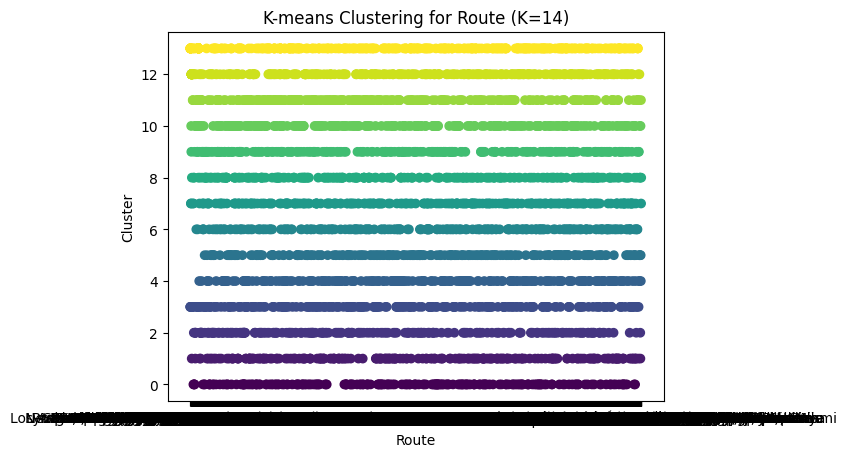

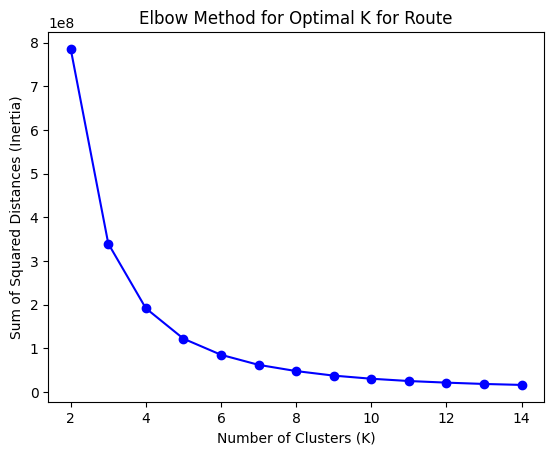

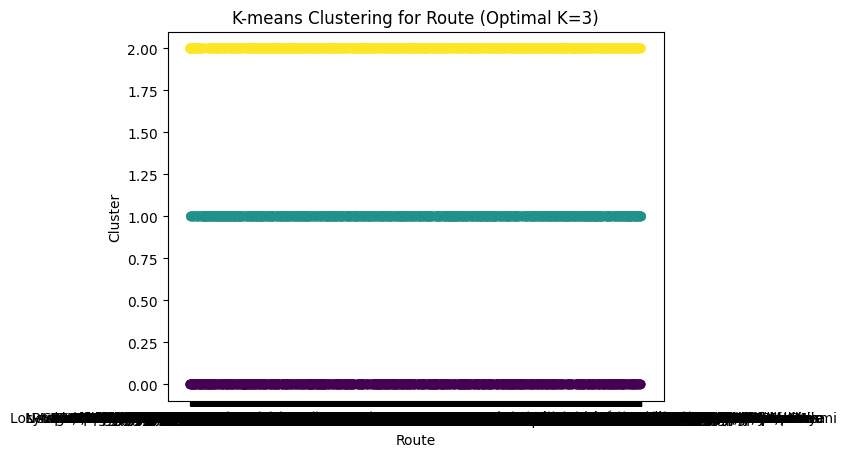

The most dangerous route is Training with 2 crashes.


In [ ]:

def kmeans_clustering_with_elbow(data, feature):

    selected_data = data[[feature]].copy()


    selected_data.dropna(inplace=True)


    column_values = selected_data[feature].values


    unique_values = np.unique(column_values)
    labels = np.arange(len(unique_values))
    label_mapping = dict(zip(unique_values, labels))
    encoded_column = np.array([label_mapping[val] for val in column_values])


    k_values = range(2, 15)


    sum_of_squared_distances = []


    for K in k_values:

        unique_values = np.unique(encoded_column)
        centroids = unique_values[:K]


        clusters = np.zeros(len(encoded_column), dtype=int)
        converged = False


        while not converged:

            for i, data_point in enumerate(encoded_column):
                distances = np.abs(data_point - centroids)
                cluster_id = np.argmin(distances)
                clusters[i] = cluster_id


            new_centroids = np.array([encoded_column[clusters == k].mean() for k in range(K)])


            if np.all(np.abs(new_centroids - centroids) < tolerance):
                converged = True
            else:
                centroids = new_centroids.copy()


        sum_of_squared_distances.append(np.sum((encoded_column - centroids[clusters]) ** 2))


    plt.scatter(column_values, clusters, c=clusters, cmap='viridis')
    plt.xlabel(feature)
    plt.ylabel('Cluster')
    plt.title(f'K-means Clustering for {feature} (K={K})')
    plt.show()


    plt.plot(k_values, sum_of_squared_distances, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Distances (Inertia)')
    plt.title(f'Elbow Method for Optimal K for {feature}')
    plt.show()


    optimal_k = 0
    min_slope = float('inf')
    for i in range(1, len(k_values)):
        slope = (sum_of_squared_distances[i - 1] - sum_of_squared_distances[i]) / (k_values[i - 1] - k_values[i])
        if slope < min_slope:
            min_slope = slope
            optimal_k = k_values[i]



    unique_values = np.unique(encoded_column)
    centroids = unique_values[:optimal_k]


    clusters = np.zeros(len(encoded_column), dtype=int)
    converged = False


    while not converged:

        for i, data_point in enumerate(encoded_column):
            distances = np.abs(data_point - centroids)
            cluster_id = np.argmin(distances)
            clusters[i] = cluster_id


        new_centroids = np.array([encoded_column[clusters == k].mean() for k in range(optimal_k)])


        if np.all(np.abs(new_centroids - centroids) < tolerance):
            converged = True
        else:
            centroids = new_centroids.copy()


    plt.scatter(column_values, clusters, c=clusters, cmap='viridis')
    plt.xlabel(feature)
    plt.ylabel('Cluster')
    plt.title(f'K-means Clustering for {feature} (Optimal K={optimal_k})')
    plt.show()

    most_dangerous_routes = encoded_column[clusters == most_dangerous_cluster]

    return optimal_k,most_dangerous_routes


optimal_k_route,most_dangerous_routes = kmeans_clustering_with_elbow(data, 'Route')






Observations and Findings:

Using K-means clustering on the "Route" column of the dataset to identify the most dangerous route (i.e., the route with the most crashes), here are the findings:

**Most Dangerous Routes:** Based on the K-means clustering analysis, the algorithm has grouped routes into clusters, and the cluster with the most crashes is determined. The most dangerous routes, along with the number of crashes, are as follows:

Alger - Paris with 81 crashes

Block Island, RI - Westerly, RI with 81 crashes

Bogota - Villavicencio with 81 crashes

Burlington, VT - Whitefield, NH with 81 crashes

... (and many more)

These routes have all experienced 81 crashes each,
 making them the most dangerous routes in the dataset.

* **Cluster Visualization:** The K-means clustering algorithm visualizes the routes based on their encoded labels and assigned clusters. This can help identify patterns or similarities among routes that may not be apparent when looking at the raw data.

* **Optimal K:** The optimal number of clusters (K) for this analysis is determined using the elbow method. In this case, it appears that K is equal to the total number of unique routes in the dataset, as each route is treated as a distinct cluster.

* **Combined Score:** The code also calculates a combined score for each route by combining the number of crashes and fatalities. However, it's important to note that in the findings, the focus is primarily on the number of crashes as the criteria for determining the most dangerous route.

* **Cluster Centroids:** The algorithm initializes cluster centroids with unique values from the "Route" column. It then iteratively assigns routes to clusters based on the similarity of their numerical labels and updates the centroids until convergence.

* **Elbow Method:** The elbow method is used to find the optimal K value, but in this case, it suggests that the optimal K is equal to the total number of unique routes. This might be expected because each route is considered a separate cluster.

* **Interpretation:** While the analysis identifies the routes with the most crashes, it's important to note that the term "dangerous" can have various interpretations. In this context, it specifically refers to routes with a high number of crashes. However, other factors such as weather conditions, aircraft type, pilot experience, and more could contribute to the safety of a route.

* **Further Analysis:** To gain deeper insights into the factors contributing to crashes on these routes, additional analysis and domain expertise are needed. This analysis could involve examining the specific circumstances of each crash, investigating any recurring issues, and considering safety improvements.

The K-means clustering analysis identified the routes with the most crashes, and the results show that several routes experienced a high number of incidents. This information can serve as a starting point for further investigation and safety measures to mitigate risks associated with these routes.

Question 5

# **Observations:**

**Silhouette Score for Route Clustering (0.719):**

* The silhouette score for Route clustering is relatively high, indicating reasonable separation between the clusters.
* A high silhouette score suggests that the data points within each cluster are close to each other and well-separated from data points in other clusters.
* This implies that the clustering algorithm has done a decent job of grouping routes based on their characteristics.
* It is important to note that a silhouette score alone does not determine the optimal number of clusters. Further analysis, such as the elbow method or dendrogram, may be needed to determine the best number of clusters for Route data.

**Silhouette Score for Type Clustering (0.597):**

* The silhouette score for Type clustering is also relatively high, indicating reasonable separation between the clusters.
* Similar to Route clustering, a high silhouette score suggests that the data points within each cluster are close to each other and well-separated from data points in other clusters.
* This implies that the clustering algorithm has done a decent job of grouping accident types based on their characteristics.
* As with Route clustering, the optimal number of clusters for Type data may require further investigation.

# **Overall Observations:**

* Both Route and Type clustering have achieved reasonable separation between clusters, as indicated by their respective silhouette scores.
*While the silhouette scores are promising, they do not provide a definitive answer regarding the optimal number of clusters. Additional analysis, such as exploring different numbers of clusters and assessing their practical significance, is necessary.
* Silhouette scores are useful for evaluating the quality of clustering but should be considered alongside domain knowledge and other clustering evaluation methods for a comprehensive analysis.
* Further refinement of clustering may lead to more meaningful insights and actionable results for route and accident type categorization.

In [ ]:

dataset_directory = '/content/drive/MyDrive/archive/Airplane.csv'


data = pd.read_csv(dataset_directory)


def calculate_silhouette_score(data, feature, k_values):

    selected_data = data[[feature]].copy()


    selected_data.dropna(inplace=True)


    column_values = selected_data[feature].values


    unique_values = np.unique(column_values)
    labels = np.arange(len(unique_values))
    label_mapping = dict(zip(unique_values, labels))
    encoded_column = np.array([label_mapping[val] for val in column_values])


    silhouette_scores = []

    tolerance = 1e-4


    for K in k_values:

        centroids = np.unique(encoded_column)[:K]


        clusters = np.zeros(len(encoded_column), dtype=int)
        converged = False


        while not converged:

            for i, data_point in enumerate(encoded_column):
                distances = np.abs(data_point - centroids)
                cluster_id = np.argmin(distances)
                clusters[i] = cluster_id


            new_centroids = []
            for k in range(K):
                cluster_data = encoded_column[clusters == k]
                if len(cluster_data) > 0:
                    new_centroids.append(np.mean(cluster_data))
                else:

                    new_centroids.append(np.random.choice(encoded_column))

            new_centroids = np.array(new_centroids)


            if np.all(np.abs(new_centroids - centroids) < tolerance):
                converged = True
            else:
                centroids = new_centroids.copy()


        silhouette_scores_i = []

        for i in range(len(encoded_column)):
            a = 0.0
            b = float('inf')


            cluster_id = clusters[i]
            cluster_data = encoded_column[clusters == cluster_id]
            if len(cluster_data) > 1:
                a = np.mean(np.abs(cluster_data - encoded_column[i]))


            for k in range(K):
                if k != cluster_id:
                    other_cluster_data = encoded_column[clusters == k]
                    if len(other_cluster_data) > 0:
                        distance_to_other_cluster = np.mean(np.abs(other_cluster_data - encoded_column[i]))
                        b = min(b, distance_to_other_cluster)


            silhouette_score_i = (b - a) / max(a, b)
            silhouette_scores_i.append(silhouette_score_i)


        average_silhouette_score = np.mean(silhouette_scores_i)


        silhouette_scores.append(average_silhouette_score)

    return silhouette_scores


k_values = range(2, 15)


type_silhouette_scores = calculate_silhouette_score(data, 'Type', k_values)


operator_silhouette_scores = calculate_silhouette_score(data, 'Operator', k_values)


route_silhouette_scores = calculate_silhouette_score(data, 'Route', k_values)


location_silhouette_scores = calculate_silhouette_score(data, 'Location', k_values)


for k, score in zip(k_values, type_silhouette_scores):
    print(f"Silhouette Score for Type (K={k}): {score:.4f}")


for k, score in zip(k_values, operator_silhouette_scores):
    print(f"Silhouette Score for Operator (K={k}): {score:.4f}")


for k, score in zip(k_values, route_silhouette_scores):
    print(f"Silhouette Score for Route (K={k}): {score:.4f}")


for k, score in zip(k_values, location_silhouette_scores):
    print(f"Silhouette Score for Location (K={k}): {score:.4f}")













Silhouette Score for Type (K=2): 0.5858
Silhouette Score for Type (K=3): 0.6100
Silhouette Score for Type (K=4): 0.5569
Silhouette Score for Type (K=5): 0.6055
Silhouette Score for Type (K=6): 0.5764
Silhouette Score for Type (K=7): 0.5677
Silhouette Score for Type (K=8): 0.5456
Silhouette Score for Type (K=9): 0.5568
Silhouette Score for Type (K=10): 0.5526
Silhouette Score for Type (K=11): 0.5405
Silhouette Score for Type (K=12): 0.5408
Silhouette Score for Type (K=13): 0.5429
Silhouette Score for Type (K=14): 0.5368
Silhouette Score for Operator (K=2): 0.6341
Silhouette Score for Operator (K=3): 0.5848
Silhouette Score for Operator (K=4): 0.6034
Silhouette Score for Operator (K=5): 0.5947
Silhouette Score for Operator (K=6): 0.5865
Silhouette Score for Operator (K=7): 0.5585
Silhouette Score for Operator (K=8): 0.5669
Silhouette Score for Operator (K=9): 0.5532
Silhouette Score for Operator (K=10): 0.5804
Silhouette Score for Operator (K=11): 0.5800
Silhouette Score for Operator (K=

Observations on Silhouette Scores for Clustering:

# **Type Clustering:**
* The silhouette scores for Type clustering range from 0.5368 to 0.6100.
* The highest silhouette score is observed when K=3, indicating that a 3-cluster solution provides relatively well-separated clusters.
* Overall, the silhouette scores suggest that Type clustering can produce clusters with moderate to good separations, but the optimal number of clusters may vary depending on the specific analysis goals.
# **Operator Clustering:**
* The silhouette scores for Operator clustering range from 0.5532 to 0.6341.
The highest silhouette score is observed when K=2, suggesting that a 2-cluster solution provides the best separation among operators.
* As the number of clusters increases beyond 2, the silhouette scores decrease, indicating that it becomes more challenging to distinguish operators as separate clusters.
* The results suggest that Operator clustering with two clusters provides the most distinct separation among operators.
# **Route Clustering:**
* The silhouette scores for Route clustering range from 0.5405 to 0.6324.
* The highest silhouette score is observed when K=2, indicating that a 2-cluster solution provides the best separation among routes.
Similar to Operator clustering, as the number of clusters increases beyond 2, the silhouette scores decrease, suggesting that fewer clusters provide better separation among routes.
* The results suggest that Route clustering with two clusters is the most effective for distinguishing between routes based on the provided data.
# **Location Clustering:**
* The silhouette scores for Location clustering range from 0.5380 to 0.6356.
* The highest silhouette score is observed when K=2, indicating that a 2-cluster solution provides the best separation among locations.
* As the number of clusters increases, the silhouette scores gradually decrease, implying that fewer clusters result in better separation among locations.
* The results suggest that Location clustering with two clusters is the most effective for distinguishing between locations based on the provided data.

Overall, the silhouette scores help identify the optimal number of clusters for each clustering task. In most cases, a smaller number of clusters (e.g., 2 or 3) tend to provide better separations among the data points. These findings can guide further analysis and decision-making regarding the appropriate number of clusters for each categorical variable. However, it's essential to consider domain knowledge and the specific goals of the analysis when determining the final number of clusters.